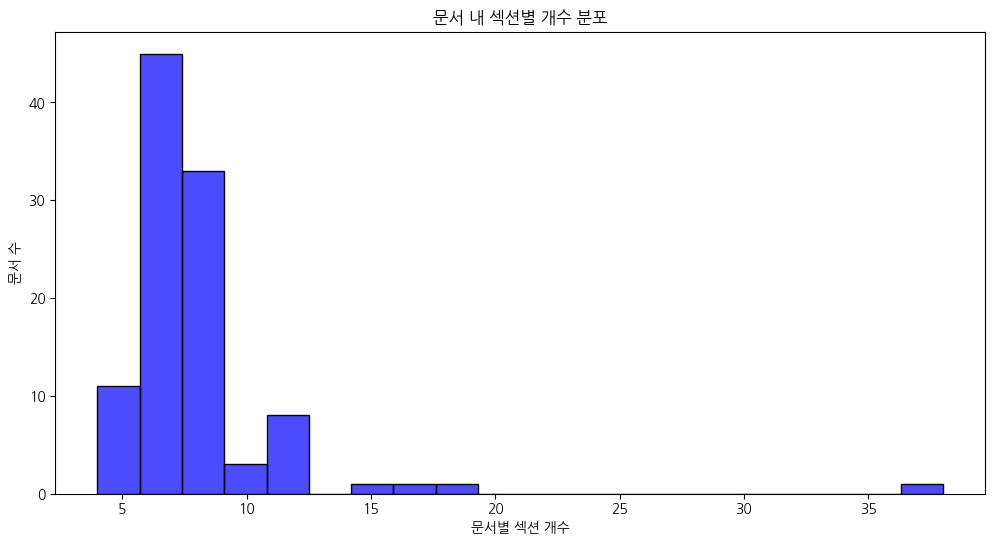

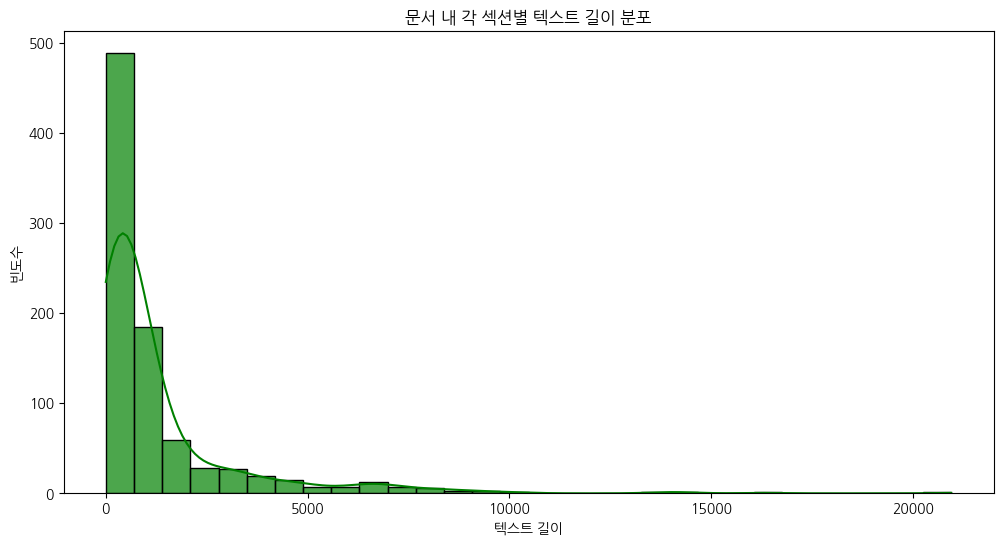

                      title             section  \
0      F.C.M 교량공사 안전보건작업 지침               Other   
1      F.C.M 교량공사 안전보건작업 지침              1. 목 적   
2      F.C.M 교량공사 안전보건작업 지침             2. 적용범위   
3      F.C.M 교량공사 안전보건작업 지침           3. 용어의 정의   
4      F.C.M 교량공사 안전보건작업 지침      5. 공통적인 안전조치사항   
..                      ...                 ...   
868  흙막이공사(지하연속벽) 안전보건작업 지침             2. 적용범위   
869  흙막이공사(지하연속벽) 안전보건작업 지침           3. 용어의 정의   
870  흙막이공사(지하연속벽) 안전보건작업 지침   4. 지하연속벽 공법의 시공순서   
871  흙막이공사(지하연속벽) 안전보건작업 지침    5. 작업전 검토 및 준비사항   
872  흙막이공사(지하연속벽) 안전보건작업 지침  6. 각 공정별 안전보건 작업기준   

                                               content  content_len  
0    KOSHA GUIDE\nC - 67 - 2016\nF.C.M 교량공사 안전보건작업 ...          810  
1    이 지침은 산업안전보건기준에 관한 규칙(이하 “안전보건규칙”이라 한다.) 제\n42...          253  
2    이 지침은 바닥으로부터 동바리를 사용하지 않고 교각위 주두부(Pier table)를...          264  
3    (1) 이 지침에서 사용되는 용어의 정의는 다음과 같다.\n(가) “F.C.M 공법...         2630  
4    (1) 관리감독자는 작업시작 전, 근로자에게 안전 작업순서

In [14]:
import os
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 입력 디렉터리 설정
input_dir = "../data/pdf_txt/"  # TXT 파일이 저장된 디렉터리

# 정규 표현식: 그림 및 표 관련 텍스트 제거 패턴
image_table_patterns = [
    r"\[그림\s*\d+\]",   # "[그림 1]" 같은 패턴
    r"\[표\s*\d+\]",     # "[표 2]" 같은 패턴
    r"그림\s*\d+",       # "그림 1"
    r"표\s*\d+"          # "표 2"
]

# 그림 및 표 관련 텍스트 제거 함수
def remove_images_and_tables(text):
    for pattern in image_table_patterns:
        text = re.sub(pattern, "", text, flags=re.MULTILINE)
    return text

# 정규 표현식: 섹션 패턴 (예: "1. 목적", "5. 공통적인 안전조치사항")
section_pattern = re.compile(r"^\d+\.\s[가-힣\s]+$")

# 데이터 저장 리스트
data = []

# TXT 파일 리스트 확인
txt_files = [f for f in os.listdir(input_dir) if f.endswith(".txt")]

# 각 TXT 파일 처리
for txt_file in txt_files:
    input_path = os.path.join(input_dir, txt_file)
    doc_name = os.path.splitext(txt_file)[0]  # 파일명 (확장자 제거)
    
    with open(input_path, "r", encoding="utf-8") as file:
        text = file.read()

    # 그림 및 표 제거
    clean_text = remove_images_and_tables(text)

    # 텍스트를 줄 단위로 분할
    lines = clean_text.split("\n")
    
    current_section = "Other"  # 기본값
    current_text = []

    for line in lines:
        line = line.strip()
        if not line:
            continue  # 빈 줄 스킵

        # 새로운 섹션 감지
        match = section_pattern.match(line)
        if match:
            # 이전 섹션 저장
            if current_text:
                data.append({"title": doc_name, "section": current_section, "content": "\n".join(current_text)})

            # 새 섹션 설정
            current_section = line
            current_text = []
        else:
            current_text.append(line)

    # 마지막 섹션 저장
    if current_text:
        data.append({"title": doc_name, "section": current_section, "content": "\n".join(current_text)})

# DataFrame 생성
df = pd.DataFrame(data)

# 🔹 섹션별 텍스트 길이 추가
df["content_len"] = df["content"].apply(len)

# 🔹 문서별 섹션 개수 계산 (그룹화)
section_counts = df.groupby("title")["section"].nunique().reset_index()
section_counts.columns = ["title", "section_count"]

# 🔹 문서별 섹션 개수 분포 시각화 (한글 유지)
plt.figure(figsize=(12, 6))
sns.histplot(section_counts["section_count"], bins=20, color="blue", alpha=0.7)
plt.xlabel("문서별 섹션 개수")
plt.ylabel("문서 수")
plt.title("문서 내 섹션별 개수 분포")
plt.show()

# 🔹 텍스트 길이 히스토그램 (한글 유지)
plt.figure(figsize=(12, 6))
sns.histplot(df["content_len"], bins=30, color="green", kde=True, alpha=0.7)
plt.xlabel("텍스트 길이")
plt.ylabel("빈도수")
plt.title("문서 내 각 섹션별 텍스트 길이 분포")
plt.show()

# 데이터프레임 확인
print(df)


In [15]:
section_counts.sort_values('section_count')

,title,section_count
12,건설공사 안전보건 설계 지침,4
44,수상 바지(Barge)선 이용 건설공사 안전작업 지침,4
49,시스템 비계 안전작업 지침,4
84,터널공사(프론트잭킹) 안전보건작업지침,4
97,흙막이공사(C.I.P공법) 안전보건작업 지침,4
...,...,...
56,우물통기초 안전보건 작업지침,12
26,굴착공사 계측관리 기술지침,15
80,터널공사(NATM공법) 안전보건작업 지침,17
83,터널공사(침매공법) 안전보건작업지침,18
